# PROJECT EECS 4404

Preprocessing 

**Feature selection**

**Feature extraction**

In [4]:
# %pip install xgboost
# %pip install lightgbm
# %pip install imbalanced-learn

In [5]:

# Data Manipulation
import numpy as np 
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, RocCurveDisplay
from   sklearn.linear_model import LogisticRegression
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from   sklearn.neighbors import KNeighborsClassifier
from   xgboost import XGBClassifier
from   lightgbm import LGBMClassifier
from   sklearn.feature_selection import SelectKBest, f_classif, RFECV
from   sklearn.neural_network import MLPClassifier
from   sklearn.experimental import enable_iterative_imputer
from   sklearn.impute import IterativeImputer


input_file_name = "data/Player Per Game.csv"
input_target_class = 'pos'
nba_players = label = features = X = Y = None
encoder = OneHotEncoder()
leEncoder = LabelEncoder()


def visualizeData(nba_players):
    ### no null values
    nba_players.info()  
    ## metrics
    print(nba_players.groupby(input_target_class).mean())
    # count of the values to make sure it was relatively balanced
    print(nba_players[input_target_class].value_counts())

def dropColumns(players, features):
    ## drop some irrevelant features
    players.drop(features, axis=1, inplace=True)
 


In [6]:
nba_players = pd.read_csv(input_file_name).replace({"C-SF": "C", "C-F": "C", "C-PF": "C", "PG-SG": "PG","PG-SF":"PG",  "PF-SF": "PF", "PF-C": "PF", "SF-SG": "SF", "SF-PG": "SF", "PF-C": "PF", "SG-SF": "SG", "SG-PG": "SG", "SG-PF": "SG", "SF-C": "SF", "SG-SF": "SG", "SG-PG-SF": "SG", "SF-PF": "SF",})
nba_players.drop_duplicates(inplace=True)
nba_players = nba_players[nba_players['mp_per_game'] > 20]
nba_players = nba_players[nba_players['pos'].isin(["SG", "PF", "C", "SF", "PG"])]
dropColumns(nba_players, {'seas_id', 'season', 'player_id', 'player', 'birth_year','age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp_per_game', 'pf_per_game', 'ft_percent','fta_per_game', 'ft_per_game'})
features = list(nba_players.columns.delete(0))

imputer = IterativeImputer(max_iter=10, random_state=0)

for i in nba_players.columns[nba_players.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
   nba_players[i] = imputer.fit_transform(np.reshape(nba_players[i].values, (-1, 1)))


x = nba_players[features].values
y = nba_players[input_target_class].values
y = encoder.fit_transform(np.reshape(y, (-1, 1))).toarray()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.18, random_state=42)
min_max_scaler = MinMaxScaler().fit(X_train)  
X_train, X_test = min_max_scaler.transform(X_train), min_max_scaler.transform(X_test)

X_train.shape


(12024, 18)

In [7]:
visualizeData(nba_players)
dropColumns(nba_players, input_target_class) 
nba_players.skew()

<class 'pandas.core.frame.DataFrame'>
Index: 14664 entries, 2 to 30465
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pos            14664 non-null  object 
 1   fg_per_game    14664 non-null  float64
 2   fga_per_game   14664 non-null  float64
 3   fg_percent     14664 non-null  float64
 4   x3p_per_game   14664 non-null  float64
 5   x3pa_per_game  14664 non-null  float64
 6   x3p_percent    14664 non-null  float64
 7   x2p_per_game   14664 non-null  float64
 8   x2pa_per_game  14664 non-null  float64
 9   x2p_percent    14664 non-null  float64
 10  e_fg_percent   14664 non-null  float64
 11  orb_per_game   14664 non-null  float64
 12  drb_per_game   14664 non-null  float64
 13  trb_per_game   14664 non-null  float64
 14  ast_per_game   14664 non-null  float64
 15  stl_per_game   14664 non-null  float64
 16  blk_per_game   14664 non-null  float64
 17  tov_per_game   14664 non-null  float64
 18  pts_per_gam

fg_per_game      0.860670
fga_per_game     0.749044
fg_percent       0.374438
x3p_per_game     1.255505
x3pa_per_game    1.065179
x3p_percent     -0.252359
x2p_per_game     0.854352
x2pa_per_game    0.794591
x2p_percent      0.279731
e_fg_percent     0.164877
orb_per_game     1.092352
drb_per_game     1.212461
trb_per_game     1.392297
ast_per_game     1.443482
stl_per_game     1.203823
blk_per_game     2.504541
tov_per_game     0.760921
pts_per_game     0.892196
dtype: float64

            Specs        Score
12   trb_per_game  2985.979641
13   ast_per_game  2356.845097
10   orb_per_game  2265.257237
11   drb_per_game  1989.769309
15   blk_per_game  1646.211476
4   x3pa_per_game   555.980284
2      fg_percent   544.312705
3    x3p_per_game   497.831603
14   stl_per_game   402.405629
5     x3p_percent   340.842662
8     x2p_percent   221.641119
16   tov_per_game   115.880705
9    e_fg_percent    90.639143
1    fga_per_game    66.479511
6    x2p_per_game    56.389629
17   pts_per_game    29.906770
0     fg_per_game    24.740448
7   x2pa_per_game    22.080921


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


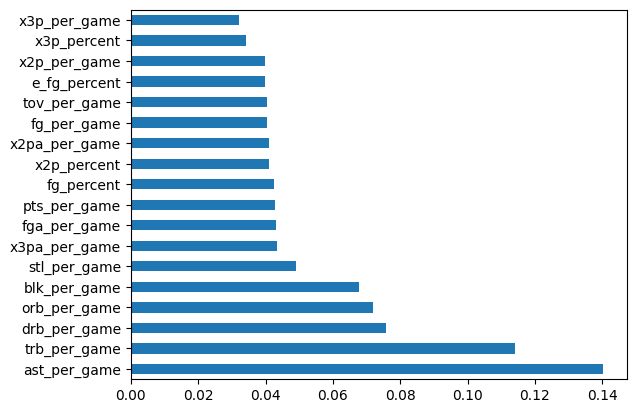

Optimal number of features: 16


In [8]:
topFeatures = 18
selector = SelectKBest(score_func=f_classif, k=topFeatures)  
fit = selector.fit(X_train, encoder.inverse_transform(y_train))

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(topFeatures,'Score'))

model = ExtraTreesClassifier()
model.fit(X_train, y_train)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features)
feat_importances.nlargest(topFeatures).plot(kind='barh')
plt.show()

rfc = RandomForestClassifier()
min_features_to_select = 1  # Minimum number of features to consider

rfecv = RFECV(
    estimator=rfc,
    step=1,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

In [9]:
mask = rfecv.get_support()
best_features = nba_players.columns[mask]
print(best_features)  # choose using rfev selectKbest and featureInportance form classifiers
X_old = X_train
x_test = X_test
X_train = X_train[:,mask]
X_test  = X_test[:,mask]


Index(['fg_per_game', 'fga_per_game', 'fg_percent', 'x3pa_per_game',
       'x2p_per_game', 'x2pa_per_game', 'x2p_percent', 'e_fg_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pts_per_game'],
      dtype='object')


In [10]:
model = XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    learning_rate=0.015,
    subsample=0.7,
    max_depth=10,
    colsample_bytree=0.5,
    n_estimators=1000
)
Y_train = leEncoder.fit_transform(encoder.inverse_transform(y_train))
Y_test = leEncoder.fit_transform(encoder.inverse_transform(y_test))
model = model.fit(X_train, Y_train)

predictions = model.predict(X_train)
accuracy = accuracy_score(Y_train, (predictions))
print("The accuracy of Training prediction is: ", accuracy)
accurate_predictions = accuracy_score(leEncoder.fit_transform(Y_train), predictions, normalize=False)
print("The number of accurate predictions is: ", accurate_predictions)
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, (predictions))
print("The accuracy of  Test prediction is: ", accuracy)
accurate_predictions = accuracy_score(Y_test, predictions, normalize=False)
print("The number of accurate predictions is: ", accurate_predictions)

model = RandomForestClassifier()
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("The accuracy of prediction is: ", accuracy)
accurate_predictions = accuracy_score(y_test, predictions, normalize=False)
print("The number of accurate predictions is: ", accurate_predictions)

model  = KNeighborsClassifier()
model = model.fit(X_train, y_train)
accuracy = accuracy_score(y_test, predictions)
print("The accuracy of prediction is: ", accuracy)
accurate_predictions = accuracy_score(y_test, predictions, normalize=False)
print("The number of accurate predictions is: ", accurate_predictions)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of Training prediction is:  0.9989188290086494
The number of accurate predictions is:  12011
The accuracy of  Test prediction is:  0.6465909090909091
The number of accurate predictions is:  1707
The accuracy of prediction is:  0.5306818181818181
The number of accurate predictions is:  1401
The accuracy of prediction is:  0.5306818181818181
The number of accurate predictions is:  1401


In [34]:
parameter = {
    'hidden_layer_sizes': [(10,30,10),(12,), (12, 12), (12,6,3,1),(12,12,12,12),(12,6,12,3,12,1)],
    'alpha': [0.0001, 0.05, 0.1, 0.3, 0.01],
}


mlp = MLPClassifier(learning_rate='adaptive',learning_rate_init=0.1, activation='logistic', solver='sgd', max_iter=3000)
grid = GridSearchCV(estimator=mlp, param_grid=parameter,)
grid.fit(X_train,y_train)
# mlp.fit(X_train,y_train)

# predictions = mlp.predict(X_train)
# # predictions = mlp.predict(X_test)
# accuracy = accuracy_score(y_train, predictions)
# print("The accuracy of prediction is: ", accuracy)

# # find number of accurate predictions
# accurate_predictions = accuracy_score(y_train, predictions, normalize=False)
# # print("The number of accurate predictions is: ", accurate_predictions)
# # mlp.get_params

GridSearchCV(estimator=MLPClassifier(activation='logistic',
                                     learning_rate='adaptive',
                                     learning_rate_init=0.1, max_iter=3000,
                                     solver='sgd'),
             param_grid={'alpha': [0.0001, 0.05, 0.1, 0.3, 0.01],
                         'hidden_layer_sizes': [(10, 30, 10), (12,), (12, 12),
                                                (12, 6, 3, 1), (12, 12, 12, 12),
                                                (12, 6, 12, 3, 12, 1)]})

In [35]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.0001, 'hidden_layer_sizes': (12, 12)}
0.5818359906047095


In [ ]:

plt.plot(mlp.loss_curve_, label="Cost")
plt.legend()
plt.show()


In [33]:
predictions = mlp.predict(X_test)
# predictions = mlp.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("The accuracy of prediction is: ", accuracy)

# find number of accurate predictions
accurate_predictions = accuracy_score(y_test, predictions, normalize=False)
print("The number of accurate predictions is: ", accurate_predictions)

The accuracy of prediction is:  0.5723484848484849
The number of accurate predictions is:  1511
